In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Загрузить файл data_breast.csv.
В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте

In [2]:
ds = pd.read_csv('data_breast.csv')
ds = ds.drop('Unnamed: 32',1)
print(ds.shape)
ds.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Описание данных:
    
    1) ID number 
    2) Diagnosis (M = malignant, B = benign) 
    3-32) Ten real-valued features are computed for each cell nucleus: 
        a) radius (mean of distances from center to points on the perimeter) 
        b) texture (standard deviation of gray-scale values) 
        c) perimeter 
        d) area 
        e) smoothness (local variation in radius lengths) 
        f) compactness (perimeter^2 / area - 1.0) 
        g) concavity (severity of concave portions of the contour) 
        h) concave points (number of concave portions of the contour) 
        i) symmetry 
        j) fractal dimension ("coastline approximation" - 1)

In [3]:
ds['illness'] = (ds['diagnosis']=='M').astype(int)

## 2) Рассчитать основные статистики для переменных
(среднее, медиана, мода, мин/макс, сред. отклонение).

In [4]:
ds['illness'].mean()

0.37258347978910367

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


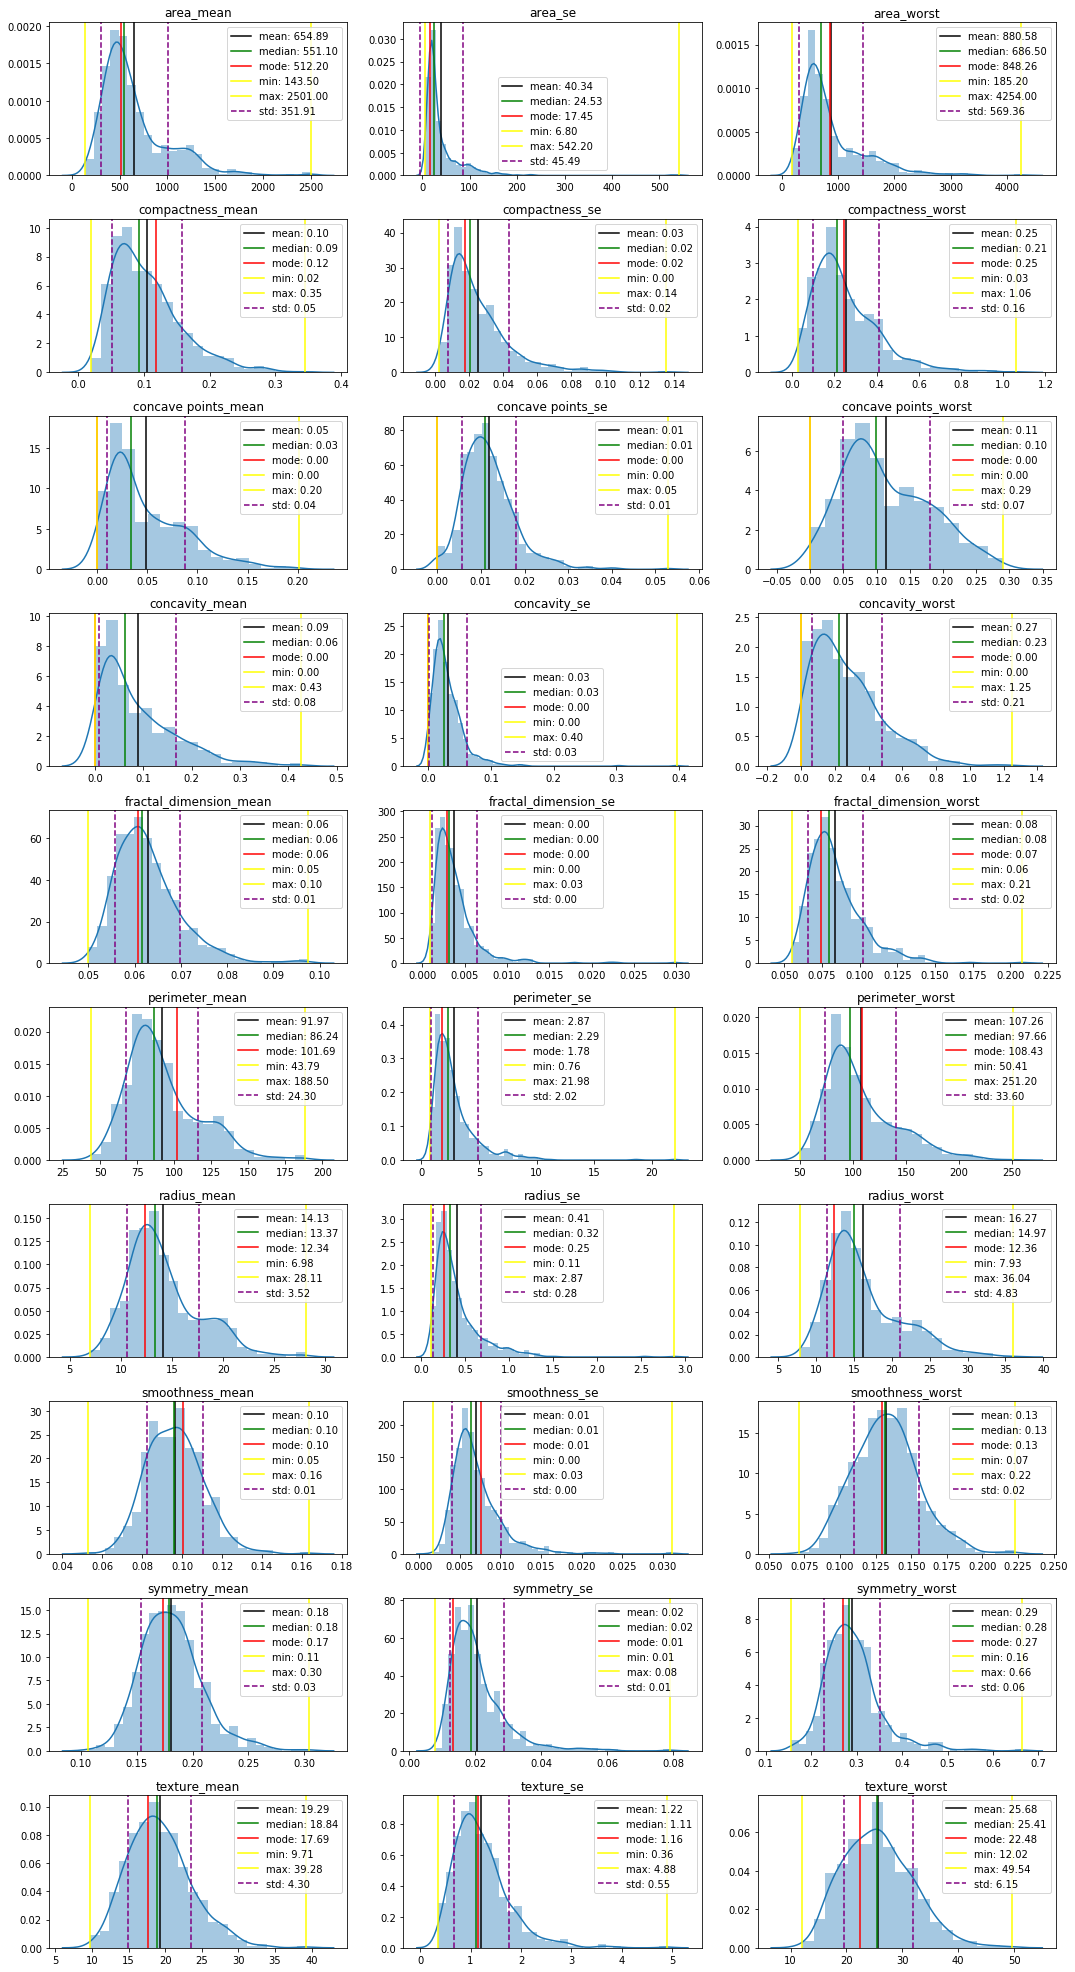

In [5]:
plt.figure(figsize=(15,30))
for idx, f in enumerate(sorted(ds.drop(['id','diagnosis', 'illness'],1).columns)):
    plt.subplot((ds.shape[1]-2)//3+1, 3, idx+1)
    sns.distplot(ds[f])
    mean, median, mode = ds[f].mean(), ds[f].median(), ds[f].mode().mean()
    mn, mx = ds[f].min(), ds[f].max()
    std = ds[f].std()
    plt.axvline(mean, label=f'mean: {mean:.2f}', color='black')
    plt.axvline(median, label=f'median: {median:.2f}', color='green')
    plt.axvline(mode, label=f'mode: {mode:.2f}', color='red')
    plt.axvline(mn, label=f'min: {mn:.2f}', color='yellow')
    plt.axvline(mx, label=f'max: {mx:.2f}', color='yellow')
    plt.axvline(mean+std, label=f'std: {std:.2f}', color='purple', linestyle='--')
    plt.axvline(mean-std, color='purple', linestyle='--')
    plt.xlabel('')
    plt.legend()
    plt.title(f)
plt.tight_layout()
plt.show()

## 3) Выбрать стратегию для работы с пропущенными значениями.

In [6]:
ds.isnull().sum().sum()

0

В датасете нет пропущенных значений

## 4) Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
cds = ds.drop('id',1).corr()
cols = sorted(cds.index)
cols.remove('illness')
cols = ['illness']+cols
cds = cds.reindex(index=cols,columns=cols)

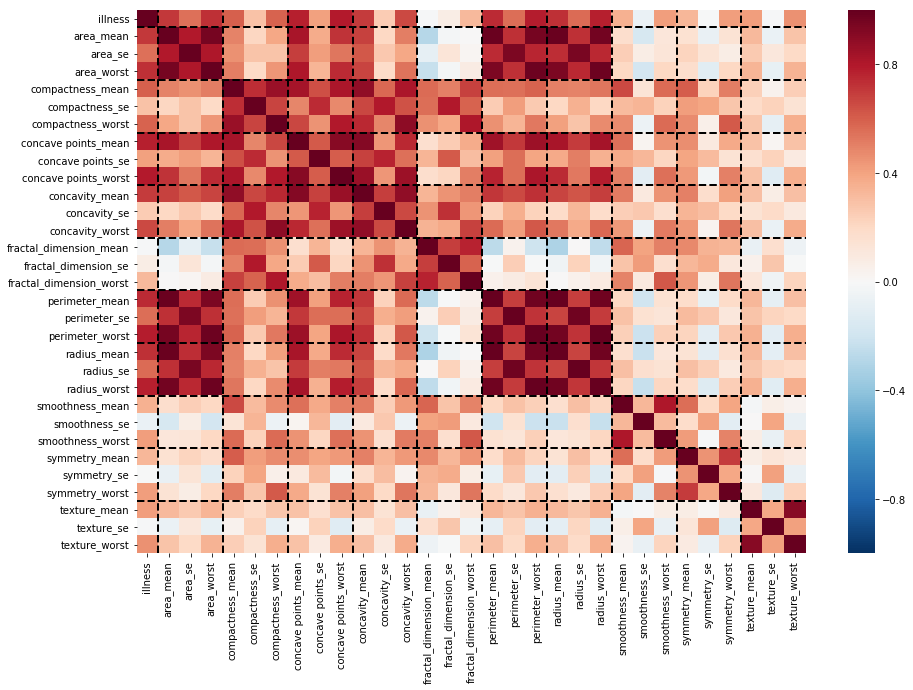

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(cds, cmap='RdBu_r', vmin=-1, vmax=1)
for i in range(1,31, 3):
    plt.axvline(i, linestyle='--', linewidth=2, color='black')
    plt.axhline(i, linestyle='--', linewidth=2, color='black')
plt.show()

* Столбцы в квадратах 3х3 по диагонали сильно коррелируют друг с другом, т.к. они основаны на одном исходном признаке
* area, perimeter, radius сильно коррелируют друг с другом.
* concavity коррелирует с compactness, concave points, perimeter и radius
* texture почти ни с чем не кореллирует
* illness коррелирует с compactness, concavity, concave points, perimeter и radius

## 5) Визуализировать взаимосвязи между переменными
(scatter plots, гистограммы, …).

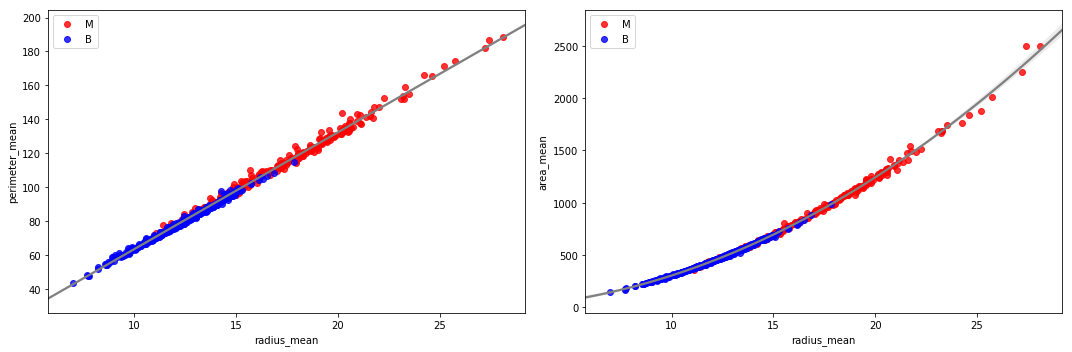

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.regplot(x='radius_mean', y='perimeter_mean', data=ds[ds['diagnosis']=='M'],
            fit_reg=False, marker='o', label='M', color='red')
sns.regplot(x='radius_mean', y='perimeter_mean', data=ds[ds['diagnosis']=='B'],
            fit_reg=False, marker='o', label='B', color='blue')
sns.regplot(x='radius_mean', y='perimeter_mean', data=ds, line_kws={'color':'grey'}, marker='')
plt.legend()

plt.subplot(122)
sns.regplot(x='radius_mean', y='area_mean', data=ds[ds['diagnosis']=='M'],
            fit_reg=False, marker='o', label='M', color='red')
sns.regplot(x='radius_mean', y='area_mean', data=ds[ds['diagnosis']=='B'],
            fit_reg=False, marker='o', label='B', color='blue')
sns.regplot(x='radius_mean', y='area_mean', data=ds, line_kws={'color':'grey'}, marker='', order=2)
plt.legend()
plt.tight_layout()
plt.show()

Рассмотрим только признаки с "mean". "se" и "worst" сильно с ними коррелируют

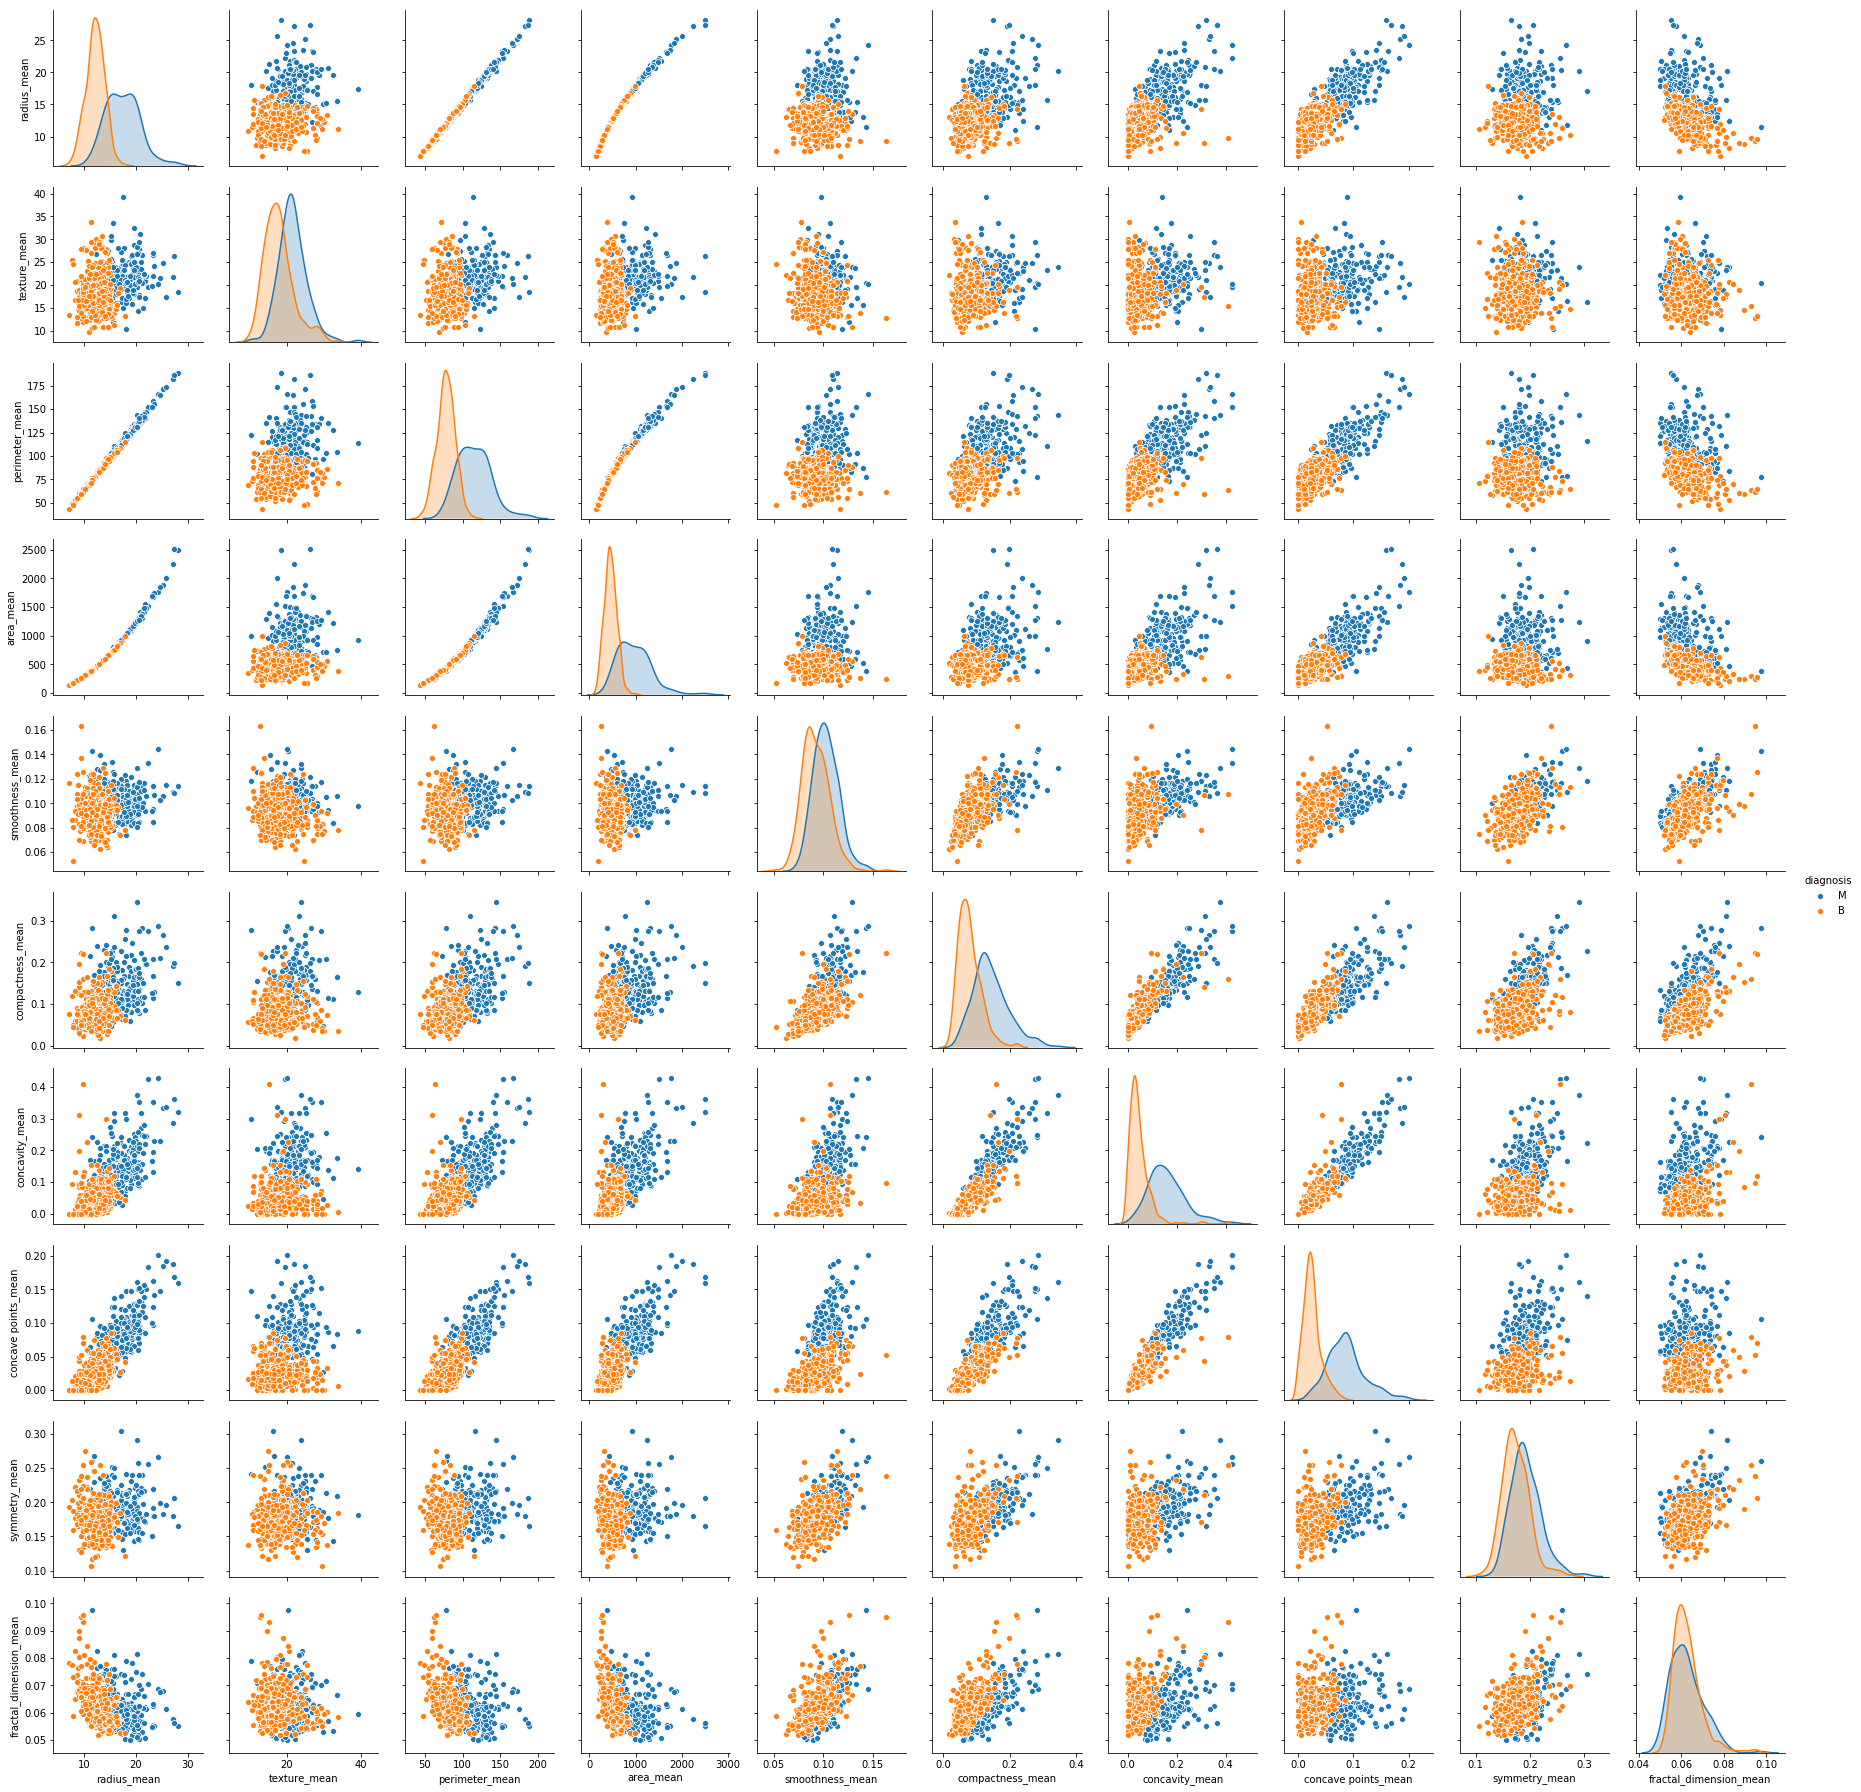

In [10]:
sns.pairplot(data=ds[[x for x in ds.columns if '_mean' in x]+['diagnosis']], hue='diagnosis')

## 6) С помощью статистических методов проверить взаимосвязи между переменными.

* H0 - данные взяты из одного распределения
* H1 - данные взяты из разных распределений

In [11]:
from scipy.stats import mannwhitneyu

Проверим как различаются средние значения признаков для больных и здоровых пациентов

In [12]:
res = {}
for f in [x for x in ds.columns if '_mean' in x]:
    p = mannwhitneyu(ds[ds['diagnosis']=='M'][f], ds[ds['diagnosis']=='B'][f]).pvalue
    res[f] = p
res = pd.Series(res)

Сделаем поправку Бонферрони на множественные гипотезы

In [13]:
alpha = 0.05/len(res)

In [14]:
res<alpha

radius_mean                True
texture_mean               True
perimeter_mean             True
area_mean                  True
smoothness_mean            True
compactness_mean           True
concavity_mean             True
concave points_mean        True
symmetry_mean              True
fractal_dimension_mean    False
dtype: bool

Единственный неважный признак - fractal_dimension

## 7) Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

Судя по графикам зависимости распределений в п.5 и по результатам тестов в п.6, текущие признаки уже достаточно хорошо разделяют целевые классы. Поэтому нет особой необходимости генерировать новые переменные.

При этом, многие признаки сильно коррелируют друг с другом (например радиус и площадь), поэтому в данном случае будет эффективнее сократить размерность признаков.

## 8) Рассчитать Feature Selection для выбранных переменных.

In [15]:
X = ds.drop(['id','diagnosis','illness'],1)
Y = ds['illness']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test = pd.DataFrame(X_train, columns=X.columns), pd.DataFrame(X_test, columns=X.columns)

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score

In [20]:
alphas = np.linspace(0.000001, 0.1, 100)
rocs = []
n_feats = []
for a in alphas:
    lr = Lasso(alpha=a)
    lr.fit(X_train, Y_train)
    rocs.append(roc_auc_score(Y_test, lr.predict(X_test)))
    n_feats.append((lr.coef_!=0).sum())

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
lr.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [22]:
cds = pd.DataFrame()
cds['alpha'] = alphas
cds['roc'] = rocs
cds['n_feat'] = n_feats
cds['n_feat'] = cds['n_feat']

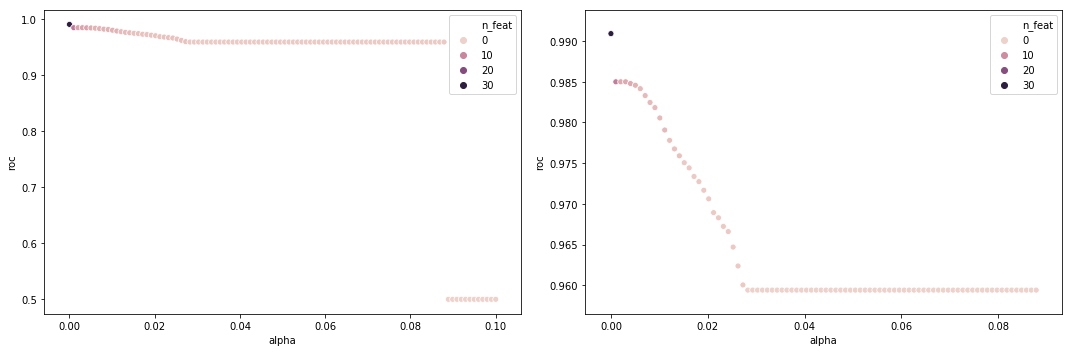

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='alpha',y='roc',data=cds, hue='n_feat')
plt.subplot(122)
sns.scatterplot(x='alpha',y='roc',data=cds[(cds['roc']>0.9)], hue='n_feat')
plt.tight_layout()
plt.show()

In [24]:
cds.iloc[cds['roc'].argmax()]

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


alpha      0.000001
roc        0.990913
n_feat    30.000000
Name: 0, dtype: float64

Максимальное качество достигается при 14 признаках и примерно сохраняет своё значение при 7 признаках

In [25]:
cds.head(10)

,alpha,roc,n_feat
0,0.000001,0.990913,30
1,0.001011,0.984996,12
2,0.002021,0.984996,6
3,0.003031,0.984996,6
4,0.004041,0.984784,6
5,0.005051,0.984573,5
6,0.006062,0.984150,4
7,0.007072,0.983305,4
8,0.008082,0.982460,4
9,0.009092,0.981826,4


roc_auc score 0.9849957734573119


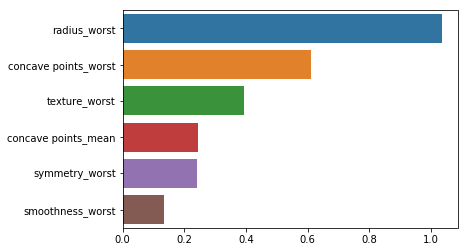

In [26]:
lr = Lasso(alpha=cds.loc[2,'alpha'])
lr.fit(X_train,Y_train)
print('roc_auc score', roc_auc_score(Y_test, lr.predict(X_test)))
s = pd.Series(lr.coef_, index=X_train.columns)
s = s[s!=0]
s = s[s.abs().sort_values(ascending=False).index]
sns.barplot(y=s.index, x=s.values)

roc_auc score 0.9847844463229078


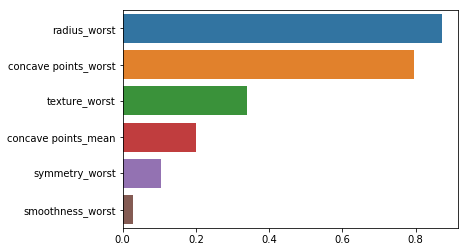

In [27]:
lr = Lasso(alpha=cds.loc[4,'alpha'])
lr.fit(X_train,Y_train)
print('roc_auc score', roc_auc_score(Y_test, lr.predict(X_test)))
s = pd.Series(lr.coef_, index=X_train.columns)
s = s[s!=0]
s = s[s.abs().sort_values(ascending=False).index]
sns.barplot(y=s.index, x=s.values)

Оставим признаки из последнего эксперимента

In [28]:
s.index

Index(['radius_worst', 'concave points_worst', 'texture_worst',
       'concave points_mean', 'symmetry_worst', 'smoothness_worst'],
      dtype='object')

## 9) Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма.
Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train[s.index], Y_train)
rf_preds = rf.predict_proba(X_test[s.index])[:,1]

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
print('Вероятность болезни')
rf_preds

Вероятность болезни


array([0. , 0.1, 1. , 0. , 1. , 0. , 0.2, 1. , 1. , 0.1, 0. , 0.6, 0. ,
       0.3, 0.1, 0.9, 0.9, 0. , 1. , 0. , 0.7, 0. , 0. , 0.3, 0. , 0.1,
       0. , 0.3, 0. , 0. , 0. , 0. , 1. , 0.1, 0.9, 0. , 0.3, 0.4, 0. ,
       0. , 0.1, 1. , 0. , 1. , 1. , 1. , 1. , 0.8, 0. , 0. , 1. , 0. ,
       1. , 0.6, 0. , 0. , 0. , 0.4, 1. , 0. , 1. , 0. , 0. , 0. , 0.3,
       0. , 0. , 0.3, 0.2, 0. , 0. , 0.1, 0.3, 0. , 1. , 0. , 1. , 0. ,
       0.2, 0. , 0.5, 0. , 1. , 0. , 0.7, 1. , 0. , 0.1, 1. , 0. , 0. ,
       1. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.7, 0. , 1. , 0. , 0. ,
       1. , 0. , 0.3, 0. , 0. , 1. , 0.1, 0.9, 1. , 1. , 0. , 1. , 1. ,
       0.6, 1. , 1. , 0.8, 0.9, 1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. ,
       0.1, 0.2, 0.9, 0.8, 0.9, 0. , 0.2, 1. , 0.2, 1. , 1. , 0.2, 0. ])

Деревянная модель даёт довольно дискретные результаты.

In [32]:
lr = LogisticRegression()
lr.fit(X_train[s.index], Y_train)
lr_preds = lr.predict_proba(X_test[s.index])[:,1]

/home/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
print('Вероятность болезни')
lr_preds

Вероятность болезни


array([0.15394067, 0.02501873, 0.89086543, 0.10784871, 0.97694404,
       0.30436292, 0.36163664, 0.85056059, 0.9772234 , 0.22598865,
       0.12091931, 0.51141008, 0.10891897, 0.41450227, 0.04393792,
       0.91789412, 0.64571205, 0.11170892, 0.85934137, 0.05828202,
       0.31640804, 0.03974725, 0.14119615, 0.41588536, 0.13971025,
       0.15482669, 0.01736603, 0.0758295 , 0.1425808 , 0.03333186,
       0.03884312, 0.15608347, 0.92900418, 0.3268727 , 0.23188708,
       0.04816251, 0.39646218, 0.32092807, 0.08271783, 0.12145297,
       0.17450259, 0.9560007 , 0.03721972, 0.90930407, 0.95188062,
       0.92186072, 0.89916536, 0.40462779, 0.12691208, 0.30433417,
       0.9373538 , 0.03491484, 0.82355079, 0.39198847, 0.05165008,
       0.04225777, 0.1753795 , 0.37442997, 0.72137106, 0.08899583,
       0.77614583, 0.10944022, 0.07439601, 0.03431555, 0.29957621,
       0.18656161, 0.03669148, 0.30583421, 0.24951536, 0.31313209,
       0.07549165, 0.28454154, 0.31683056, 0.05713866, 0.80958

Логистическая регрессия предсказывает вероятность из всего множества значений 0-1

## 10) Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [35]:
rf_preds = rf.predict(X_test[s.index])
lr_preds = lr.predict(X_test[s.index])

In [36]:
for m in [accuracy_score, f1_score, precision_score, recall_score]:
    print(m.__name__, 'rf=', m(Y_test,rf_preds),
                               'lr=', m(Y_test, lr_preds))

accuracy_score rf= 0.9370629370629371 lr= 0.965034965034965
f1_score rf= 0.9158878504672897 lr= 0.9504950495049506
precision_score rf= 0.8909090909090909 lr= 0.9795918367346939
recall_score rf= 0.9423076923076923 lr= 0.9230769230769231


Логистическая регрессия даёт лучшие результаты. Видимо из-за общей простоты задачи

## 11) Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет